In [58]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.stats.outliers_influence import OLSInfluence

In [20]:
# R2: SSE/SSS is	the	portion	of variation explained by the model	

# Prob (F-statisic): If p-value < 0.05, we	can	reject the null	hypothesis.

# P >|t|:	if	p-value	< 0.05, we can reject the null hypothesis: This variable does contribute to this model

# Prob(Omnibus): The p-value for this  test. If  p-value < 0.05, we  reject  the null  hypothesis: 
# ε does  not exactly follow  the normal  distribution that  we  assumed. 

# Prob(Omnibus):  The p-value for this  test.     

# Jaque Beara: Normality Test

# Prob(JB) Null  hypothesis:  ε is  normally  distributed. 

# Skewness and Kurtosis: Idea is we  are looking for a skewness coeff.  ~ 0,  and Kurtosis  ~ 3. JB  tests if  those conditions are held  against alternatives.  

# Condition Number: Note  that  is  the condi<on  number  becomes quite large,  then  this  implies that  the matrix  is  ill-posed   (does not have  a unique, well-defined  solution). This  may be  due to  multicollinear relationships  between independent variables.

In [50]:
# Load the data in
import pickle

with open("../data/processed/0202_all_data_wdummy.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 743
Data columns (total 21 columns):
energy_star_score                          390 non-null int64
building_floor_area                        390 non-null int64
parking_floor_area                         390 non-null int64
total_ghg_emissions                        390 non-null int64
site_eui                                   390 non-null int64
weather_normalized_site_eui                390 non-null int64
source_eui                                 390 non-null int64
weather_normalized_source_eui              390 non-null int64
water_use                                  390 non-null int64
property_id                                390 non-null int64
EMV_TOTAL                                  390 non-null float64
TAX_CAPAC                                  390 non-null float64
TOTAL_TAX                                  390 non-null float64
FIN_SQ_FT                                  390 non-null int64
YEAR_BUILT           

In [51]:
# Fit regression model 

X = df.ix[:,1:]
y = df['energy_star_score']

results = sm.OLS(y,X).fit()
# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_star_score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     70.04
Date:                Thu, 02 Feb 2017   Prob (F-statistic):          2.55e-107
Time:                        21:36:29   Log-Likelihood:                -1636.5
No. Observations:                 390   AIC:                             3311.
Df Residuals:                     371   BIC:                             3386.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
building_floor_area                      7.088e-05   9.48e-06      7.476      0.000      5.22e-05  8.95e-05
parking_floor_area                       2.913e-05   1.54e-05      1.890      0.060     -1.18e-06  5.94e-05
total_ghg_emissions                        -0.0014      0.001     -1.501      0.134        -0.003     0.000
site_eui                                   -0.3182      0.659     -0.483      0.629        -1.613     0.977
weather_normalized_site_eui                 0.2627      0.628      0.418      0.676        -0.973     1.499
source_eui                                  0.0800      0.336      0.238      0.812        -0.580     0.740
weather_normalized_source_eui              -0.1979      0.326     -0.608      0.544        -0.838     0.442
water_use                                  -0.0019      0.000     -6.224      0.000        -0.003    -0.001
property_id                              1.842e-11   1.78e-12     10.325      0.000      1.49e-11  2.19e-11
EMV_TOTAL                               -9.684e-07   1.09e-06     -0.888      0.375     -3.11e-06  1.18e-06
TAX_CAPAC                                   0.0002      0.000      0.734      0.464        -0.000     0.001
TOTAL_TAX                               -7.375e-05      0.000     -0.618      0.537        -0.000     0.000
FIN_SQ_FT                               -2.093e-15   4.34e-15     -0.482      0.630     -1.06e-14  6.44e-15
YEAR_BUILT                                  0.0003      0.003      0.095      0.924        -0.005     0.005
est_val_per_sqft                            0.1063      0.035      3.002      0.003         0.037     0.176
Intercept                                  43.2166      7.441      5.808      0.000        28.585    57.848
USE1_DESC[T.Condo Garage/Miscellaneous]   -13.8552      2.728     -5.079      0.000       -19.219    -8.491
USE1_DESC[T.Cooperative]                   18.2494      4.084      4.469      0.000        10.219    26.280
USE1_DESC[T.Industrial]                     5.0443      8.570      0.589      0.556       -11.808    21.897
USE1_DESC[T.Other]                          2.5188      6.201      0.406      0.685        -9.675    14.713
==============================================================================
Omnibus:                      110.056   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1506.408
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                      12.505   Cond. No.                     1.90e+28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigen

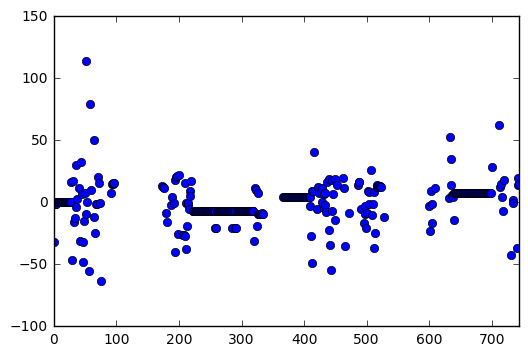

In [52]:
# Plot the residuals

results.resid.plot(style='o')

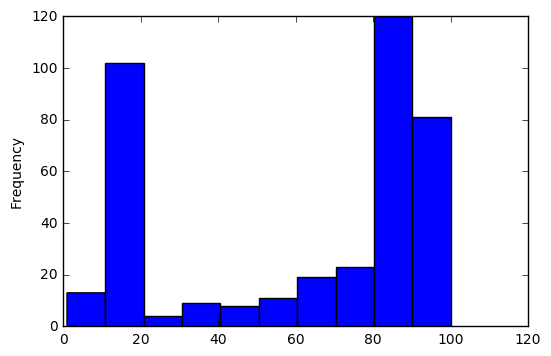

In [55]:
# Plot the target variable histogram

df.energy_star_score.plot(kind='hist');

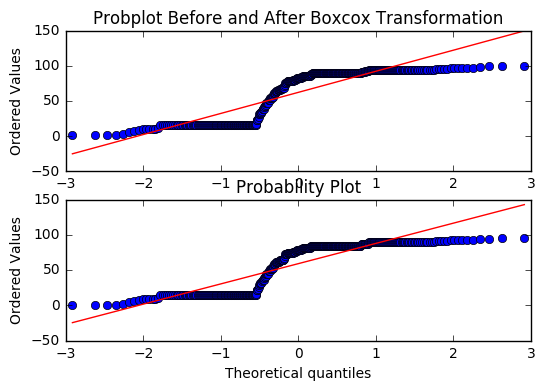

In [64]:
# Attempted a Boxcox transformation?

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['energy_star_score']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot Before and After Boxcox Transformation')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)

plt.show()

In [ ]:
def variable_diagnostics(var):
    # Normality of the residuals, Jarque-Bera test
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(results.resid)
    lzip(name, test)
    
    # Influence
    test_class = OLSInfluence(results)
    test_class.dfbetas[:5,:]
    
    # Multicolinearity, conditional number
    np.linalg.cond(results.model.exog)
    
    # Heteroskedasticity, Breush-Pagan test:    
    name = ['Lagrange multiplier statistic', 'p-value', 
            'f-value', 'f p-value']
    test = sms.het_breushpagan(results.resid, results.model.exog)
    lzip(name, test)
    
    # Linearity, 
    name = ['t value', 'p value']
    test = sms.linear_harvey_collier(results)
    lzip(name, test)

In [ ]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(s,1),y)
    pred = rgr.predict(x.reshape(s,1))

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    
    plt.subplot(1, 3, 3)
    z = (res-np.mean(res))/np.std(res)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [61]:
# Normality of the residuals, Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 1506.4084717330363),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.7679884225831901),
 ('Kurtosis', 12.504884793098169)]

In [62]:
# Influence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[  1.10307323e-03,   1.05699184e-01,  -8.71869775e-02,
         -1.86780572e-02,   1.11934093e-02,   1.99840152e-02,
         -1.00489135e-02,   5.18945788e-02,   1.01607133e-01,
          1.77549642e-02,  -1.07453661e-01,   1.12059211e-01,
         -3.76990533e+00,   4.41501396e-02,  -4.78235814e-01,
         -7.80772357e-02,  -5.51393678e-02,  -2.49312700e-02,
          9.67382971e-03,  -5.14239152e-03],
       [  2.71247742e-03,  -3.04039113e-03,   1.81345114e-06,
         -1.48583077e-04,   2.88504300e-04,   4.95017056e-04,
         -4.65083540e-04,   8.20140207e-04,  -3.41959802e-04,
         -1.33310343e-05,  -6.05124945e-05,   3.79657204e-05,
          7.39082645e+00,  -2.03948236e-03,   3.39208988e-03,
         -2.32229921e-03,   1.82364257e-03,   4.41324763e-03,
          7.51954207e-04,   1.95030990e-03],
       [  1.27739557e-03,   2.10549378e-03,  -2.64993407e-03,
         -1.01947970e-03,   1.04480903e-03,   1.11888284e-03,
         -1.06494761e-03,   4.56820474e-04

In [63]:
# Multicolinearity, conditional number
np.linalg.cond(results.model.exog)

1.9009981819608515e+28

In [8]:
# Heteroskedasticity, Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value', 
            'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 5.0290173920442935),
 ('p-value', 0.024926036289390364),
 ('f-value', 5.0494103945840205),
 ('f p-value', 0.024924320539551424)]

In [7]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -6.121436404489101), ('p value', 1.4962191082016787e-09)]

In [53]:
with open('../data/processed/0202_all_data_transf.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)